# Ch 05. Statistics
* Code from Data Science from Scratch by Joel Grus


In [84]:
from collections import Counter
from linear_algebra import sum_of_squares, dot
import math
from matplotlib import pyplot as plt
%matplotlib inline

### Number of friends of members

In [85]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [86]:
len(num_friends)

204

### Describing data

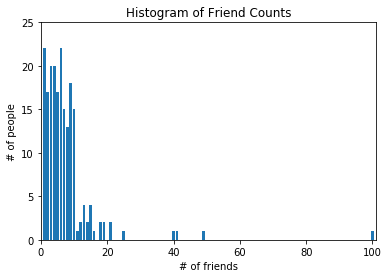

In [87]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Simple statistics about data

In [100]:
num_points = len(num_friends)
num_points

204

In [101]:
largest_value = max(num_friends) # 100
largest_value

100

In [102]:
smallest_value = min(num_friends) # 1
smallest_value

1

In [9]:
# sort the list
sorted_values = sorted(num_friends)
sorted_values[:25]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]

In [10]:
smallest_value = sorted_values[0]
smallest_value

1

In [11]:
second_smallest_value = sorted_values[1]
second_smallest_value

1

In [12]:
second_largest_value = sorted_values[-2]
second_largest_value

49

### Central Tendencies

In [13]:
def mean(x):
    return sum(x) / len(x)
mean(num_friends)

7.333333333333333

#### Median

* in order to find the median, we have to sort our data.

In [14]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [15]:
median(num_friends)

6.0

* the mean is very sensitive to outliers in our data
* If our friendliest user had 200 friends (instead of 100), then the mean would rise to 7.82, while the median would stay the same. If outliers are likely to be bad data (or otherwise unrep‐ resentative of whatever phenomenon we’re trying to understand), then the mean can sometimes give us a misleading picture. 

#### Quantile
* A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies. (The median represents the value less than which 50% of the data lies.)


In [16]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [17]:
quantile(num_friends, 0.10) # 1
quantile(num_friends, 0.25) # 3
quantile(num_friends, 0.75) # 9
quantile(num_friends, 0.90) # 13

13

In [18]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [19]:
mode(num_friends) # 1 and 6

[6, 1]

* most frequently we’ll just use the mean.

### Dispersion
* Dispersion refers to measures of how spread out our data is. 

#### Range
* the difference between the largest and smallest elements

In [20]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

In [21]:
data_range(num_friends) # 99

99

#### Variance
* A more complex measure of dispersion

In [22]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [23]:
variance(num_friends) # 81.54

81.54351395730716

#### Standard deviation

In [24]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [25]:
standard_deviation(num_friends) # 9.03

9.03014473623248

* Both the range and the standard deviation have the same outlier problem
* if our friendliest user had instead 200 friends, the standard deviation would be 14.89, more than 60% higher!
* A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value:

In [26]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [27]:
interquartile_range(num_friends) # 6

6

### Correlation
* DataSciencester’s VP of Growth has a theory that the amount of time people spend on the site is related to the number of friends they have on the site (she’s not a VP for nothing), and she’s asked you to verify this.
* investigate the relationship between daily_minutes that shows how many minutes per day each user spends on DataSciencester and num_friends list.
* covariance, the paired analogue of variance; variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means:

In [104]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


In [105]:
covariance(num_friends, daily_minutes) # 22.43

22.425435139573064

* Recall that dot sums up the products of corresponding pairs of elements. When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum. When one is above its mean and the other below, a negative number enters the sum. Accordingly, a “large” positive covariance means that x tends to be large when y is large and small when y is small. A “large” negative covariance means the opposite—that x tends to be small when y is large and vice versa. A covariance close to zero means that no such relationship exists.
* For this reason, it’s more common to look at the <b>correlation</b>, which divides out the standard deviations of both variables:

In [35]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [37]:
correlation(num_friends, daily_minutes) # 0.25

0.24736957366478218

* The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). A number like 0.25 represents a relatively weak positive correlation.

### Outliers
* Number of friends vs number of minutes

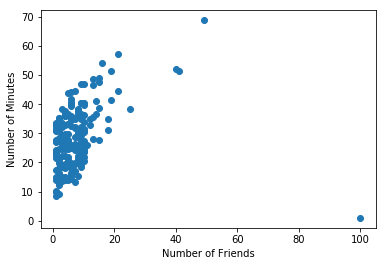

In [106]:
plt.xlabel('Number of Friends')
plt.ylabel('Number of Minutes')
plt.scatter(x=num_friends, y=daily_minutes)

* The person with 100 friends (who spends only one minute per day on the site) is huge outlier, and correlation can be very sensitive to outliers. What happens if we ignore him?

In [42]:
outlier = num_friends.index(100) # index of outlier

In [43]:
outlier

0

In [31]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [44]:
correlation(num_friends_good, daily_minutes_good) # 0.57

0.5736792115665573

* Without the outlier, there is a much stronger correlation

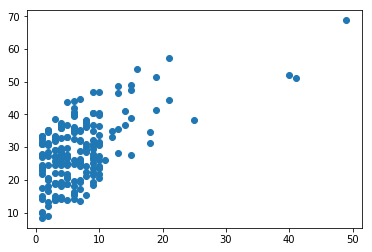

In [45]:
plt.scatter(x=num_friends_good, y=daily_minutes_good)

* You investigate further and discover that the outlier was actually an internal test account that no one ever bothered to remove. So you feel pretty justified in excluding it.

### Simpson’s Paradox
* One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be misleading when confounding variables are ignored.
* For example, imagine that you can identify all of your members as either East Coast data scientists or West Coast data scientists. You decide to examine which coast’s data scientists are friendlier:

| coast      | # of members | avg. # of friends| 
|------------|--------------|------------------|
| West Coast |          101 |               8.2| 
| East Coast |          103 |               6.5| 

* It certainly looks like the West Coast data scientists are friendlier than the East Coast data scientists. Your coworkers advance all sorts of theories as to why this might be: maybe it’s the sun, or the coffee, or the organic produce, or the laid-back Pacific vibe?
* When playing with the data you discover something very strange. If you only look at people with PhDs, the East Coast data scientists have more friends on average. And if you only look at people without PhDs, the East Coast data scientists also have more friends on average!

| coast | degree | # of members | avg. # of friends| 
| ----------------------------------------------| 
| West Coast | PhD | 35 | 3.1| 
| East Coast | PhD | 70 | 3.2| 
| West Coast | no PhD | 66 | 10.9| 
| East Coast | no PhD | 33 | 13.4| 

* Once you account for the users’ degrees, the correlation goes in the opposite direction!
Bucketing the data as East Coast/West Coast disguised the fact that the East
Coast data scientists skew much more heavily toward PhD types.
* This phenomenon crops up in the real world with some regularity. The key issue is
that correlation is measuring the relationship between your two variables all else being
equal. If your data classes are assigned at random, as they might be in a well-designed
experiment, “all else being equal” might not be a terrible assumption. But when there
is a deeper pattern to class assignments, “all else being equal” can be an awful assumption.
* The only real way to avoid this is by knowing your data and by doing what you can to
make sure you’ve checked for possible confounding factors. Obviously, this is not
always possible. If you didn’t have the educational attainment of these 200 data scientists,
you might simply conclude that there was something inherently more sociable
about the West Coast.